# Links

Everything
- https://pyimagesearch.com/start-here/

Color-Spaces, Edge Detection, and more!
- https://learnopencv.com/color-spaces-in-opencv-cpp-python/

OCR
- https://pyimagesearch.com/2017/07/10/using-tesseract-ocr-python/

In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import pytesseract
from scipy.stats import skew

data_dir = "./data/allPrintings_pics/"
plt.rcParams['figure.figsize'] = [12, 5]

# Cards
***
### Regular Card

(680, 488, 3)


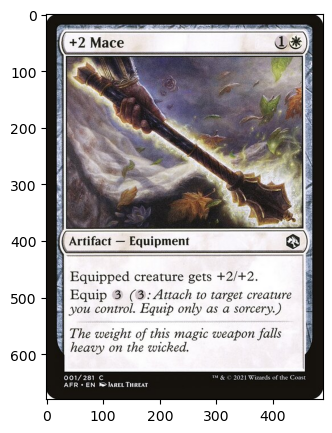

In [2]:
img1 = cv2.imread(data_dir + "+2 Mace (AFR)2.jpg")
img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
gray1 = cv2.cvtColor(img1, cv2.COLOR_RGB2GRAY)

print(img1.shape)
plt.imshow(img1);

### Outlier Card

(680, 488, 3)


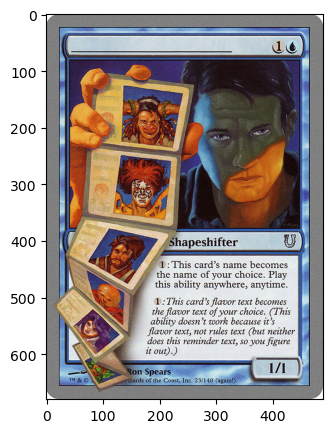

In [3]:
img2 = cv2.imread(data_dir + "_____ (UNH)1.jpg")
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)
gray2 = cv2.cvtColor(img2, cv2.COLOR_RGB2GRAY)

print(img2.shape)
plt.imshow(img2);

# Color Spaces
***

### RGB
- It is an **additive** colorspace where colors are obtained by a linear combination of Red, Green, and Blue values.
- The three channels are **correlated** by the amount of light hitting the surface.
  
  
- significant perceptual non-uniformity.
- mixing of chrominance ( Color related information ) and luminance ( Intensity related information ) data.

### Grey
- one color channel
- related to RGB

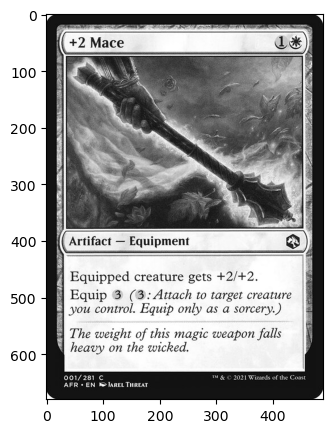

In [4]:
plt.imshow(cv2.cvtColor(img1, cv2.COLOR_RGB2GRAY), cmap="gray");

### Hue Saturation Value (HSV)

1. H – Hue ( Dominant Wavelength ).
2. S – Saturation ( Purity / shades of the color ).
3. V – Value ( Intensity ).
  
  
- one color channel
- Very intuitive to specify color.
- Device dependent.

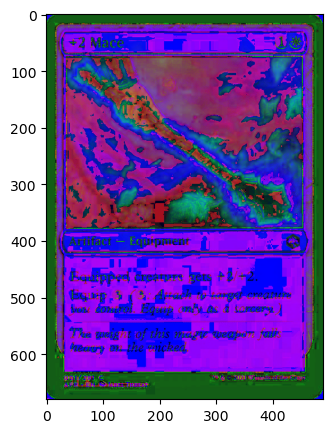

In [5]:
plt.imshow(cv2.cvtColor(img1, cv2.COLOR_RGB2HSV));

### LAB
1. L – Lightness ( Intensity ).
2. a – color component ranging from Green to Magenta.
3. b – color component ranging from Blue to Yellow.
  
  
- two color channels
- Perceptually uniform color space which approximates how we perceive color.
- Independent of device ( capturing or displaying ).
- Used extensively in Adobe Photoshop.
- Is related to the RGB color space by a complex transformation equation.

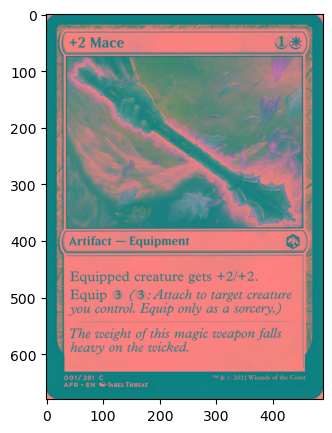

In [6]:
plt.imshow(cv2.cvtColor(img1, cv2.COLOR_RGB2LAB));

### YCrCb

1. Y – Luminance or Luma component obtained from RGB after gamma correction.
2. Cr = R – Y ( how far is the red component from Luma ).
3. Cb = B – Y ( how far is the blue component from Luma ).
  
  
- Separates the luminance and chrominance components into different channels.
- Mostly used in compression ( of Cr and Cb components ) for TV Transmission.
- Device dependent.

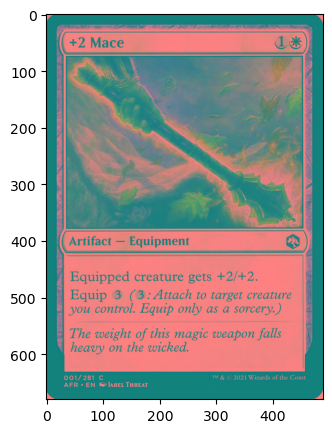

In [7]:
plt.imshow(cv2.cvtColor(img1, cv2.COLOR_RGB2YCrCb));

# Edge Detection
***

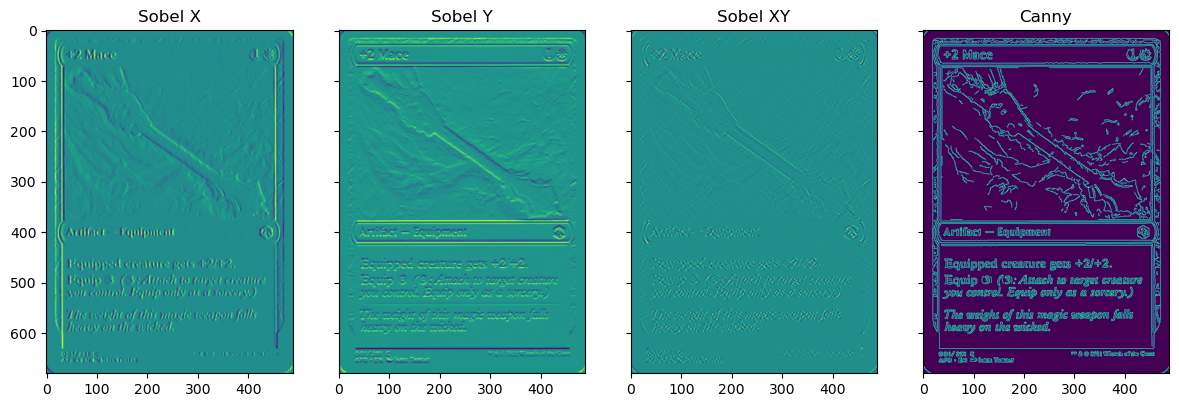

In [8]:
def edgeDetection(img):
    # Convert to graycsale
    img_gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

    # Blur the image for better edge detection
    img_blur = cv2.GaussianBlur(img_gray, (3,3), 0) 

    # Sobel Edge Detection
    sobelx = cv2.Sobel(src=img_blur, ddepth=cv2.CV_64F, dx=1, dy=0, ksize=5) # Sobel Edge Detection on the X axis
    sobely = cv2.Sobel(src=img_blur, ddepth=cv2.CV_64F, dx=0, dy=1, ksize=5) # Sobel Edge Detection on the Y axis
    sobelxy = cv2.Sobel(src=img_blur, ddepth=cv2.CV_64F, dx=1, dy=1, ksize=5) # Combined X and Y Sobel Edge Detection

    # Canny Edge Detection
    canny = cv2.Canny(image=img_blur, threshold1=100, threshold2=200) # Canny Edge Detection

    plots = {
        "Sobel X": sobelx,
        "Sobel Y": sobely,
        "Sobel XY": sobelxy,
        "Canny": canny,
    }
    
    # Display Edge Detection Images
    fig,axs = plt.subplots(1,4, sharey=True)
    plt.tight_layout()

    for i,(title,plot) in enumerate(plots.items()):
        
        plt.sca(axs[i])
        plt.title(title)
        plt.imshow(plot)
        
    return plots
        
edges = edgeDetection(img1)

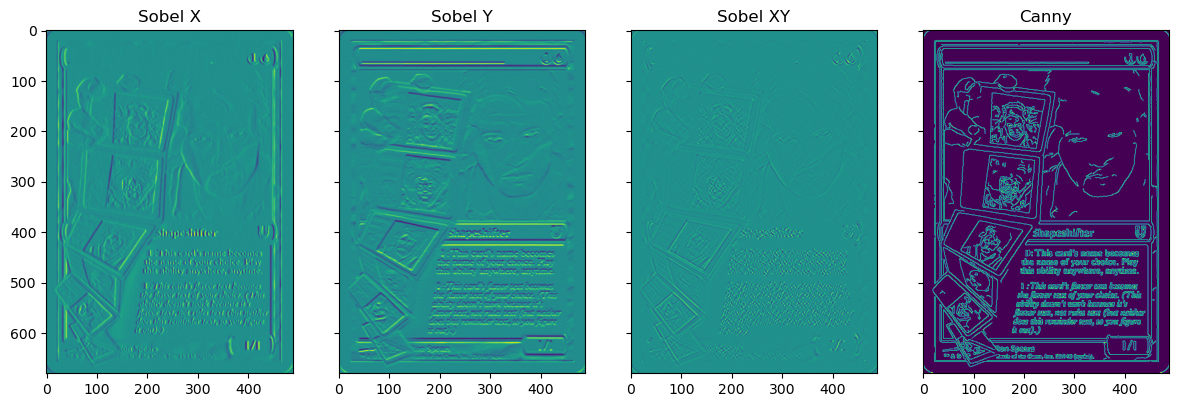

In [17]:
edgeDetection(img2);

# Masks
***

In [10]:
def getMasks():
    
    xf = 488
    yf = 680
    
    
    masks = {
        "border": np.zeros((yf,xf), dtype="uint8"),
        "name": np.zeros((yf,xf), dtype="uint8"),
        "art": np.zeros((yf,xf), dtype="uint8"),
        "desc": np.zeros((yf,xf), dtype="uint8"),
        "text": np.zeros((yf,xf), dtype="uint8"),
        "pt": np.zeros((yf,xf), dtype="uint8"),
    }
    
    # border mask
    cv2.rectangle(masks["border"], (0, 15),  (15, yf-15),    255, -1)
    cv2.rectangle(masks["border"], (15, 0),  (xf-15, 15),    255, -1)
    cv2.rectangle(masks["border"], (xf, 15), (xf-15, yf-15), 255, -1)
    cv2.rectangle(masks["border"], (15, yf), (xf-15, yf-15), 255, -1)
    
    # border mask
    cv2.rectangle(masks["name"], (30, 30),  (xf-30, 75),    255, -1)
    
    # name mask
    cv2.rectangle(masks["art"], (40, 75),  (xf-40, 375),    255, -1)
    
    # desc mask
    cv2.rectangle(masks["desc"], (30, 385),  (xf-30, 420),    255, -1)
    
    # text mask
    cv2.rectangle(masks["text"], (30, 425),  (xf-30, yf-70),    255, -1)
    
    # power/toughness mask
    cv2.rectangle(masks["pt"], (xf-110, yf-70),  (xf-45, yf-35),    255, -1)
    
    return masks

masks = getMasks()
masks.keys()

dict_keys(['border', 'name', 'art', 'desc', 'text', 'pt'])

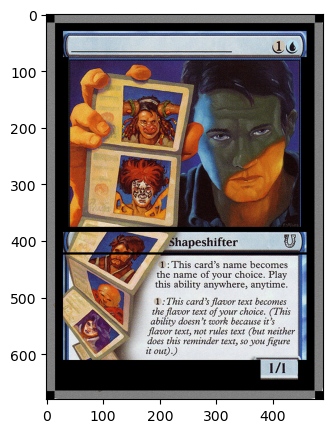

In [11]:
img2_masked = cv2.add(cv2.bitwise_and(img2, img2, mask=masks["border"]), 
                      cv2.bitwise_and(img2, img2, mask=masks["name"])
                     )
img2_masked = cv2.add(img2_masked, 
                      cv2.bitwise_and(img2, img2, mask=masks["art"]))
img2_masked = cv2.add(img2_masked, 
                      cv2.bitwise_and(img2, img2, mask=masks["desc"]))
img2_masked = cv2.add(img2_masked,
                      cv2.bitwise_and(img2, img2, mask=masks["text"]))
img2_masked = cv2.add(img2_masked,
                      cv2.bitwise_and(img2, img2, mask=masks["pt"]))

plt.imshow(img2_masked);

# Image Search
***

In [12]:
query = img2

### Colors

In [13]:
# cstats = [ RGB means, RGB stdvs, RGB skewnesses ]
cstats = np.concatenate([np.concatenate(cv2.meanStdDev(query)).flatten(), 
                        [skew(query[:,:,i].flatten()) for i in range(3)]]
                       )

# 3D histogram
chist = cv2.calcHist([query], [0, 1, 2], None, [8, 8, 8], [0, 256, 0, 256, 0, 256]).flatten()
cstats

array([ 1.34275362e+02,  1.23480807e+02,  1.21213112e+02,  6.89452554e+01,
        7.12537045e+01,  7.68150157e+01, -2.38155635e-02,  8.39314626e-02,
        1.33449904e-01])

### Texture

In [14]:
# Gray-Level Co-occurrence Matrix (GLCM)


# Fourier transform


# Histogram of Oriented Gradients


### Shapes

In [15]:
# Edge detection


# Image moments


In [16]:
features = np.concatenate([cdist, chist])

NameError: name 'cdist' is not defined

In [ ]:
np.unique(edges["Canny"])

### Optical Character Recognition (OCR)

In [ ]:
# Convert to HSV format
hsv = cv2.cvtColor(img1, cv2.COLOR_RGB2HSV)

# Define lower/upper ranges for mask
lower = np.array([0, 0, 218])
upper = np.array([157, 54, 255])

# Perform color segmentation to create a binary mask
mask = cv2.inRange(hsv, lower, upper)

# Create horizontal kernel and dilate to connect text characters
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (5,3))
dilate = cv2.dilate(mask, kernel, iterations=5)

# Find contours and filter using aspect ratio
# Remove non-text contours by filling in the contour
cnts = cv2.findContours(dilate, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cnts = cnts[0] if len(cnts) == 2 else cnts[1]
for c in cnts:
    x,y,w,h = cv2.boundingRect(c)
    ar = w / float(h)
    if ar < 5:
        cv2.drawContours(dilate, [c], -1, (0,0,0), -1)

plt.imshow(mask);

In [ ]:
# Perform color segmentation to create a binary mask
mask = cv2.inRange(edges["Canny"], 254, 255)

# Create horizontal kernel and dilate to connect text characters
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (5,3))
dilate = cv2.dilate(mask, kernel, iterations=5)

# Find contours and filter using aspect ratio
# Remove non-text contours by filling in the contour
cnts = cv2.findContours(dilate, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cnts = cnts[0] if len(cnts) == 2 else cnts[1]
for c in cnts:
    x,y,w,h = cv2.boundingRect(c)
    ar = w / float(h)
    if ar < 5:
        cv2.drawContours(dilate, [c], -1, (0,0,0), -1)

plt.imshow(mask);

In [ ]:
#pytesseract.pytesseract.tesseract_cmd = r"C:\Program Files\Tesseract-OCR\tesseract.exe"

# Bitwise dilated image with mask, invert, then OCR
result = 255 - cv2.bitwise_and(dilate, mask)
#data = pytesseract.image_to_string(result, lang='eng',config='--psm 6')
#print(data)

plt.imshow(result);